In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns 

In [12]:
dataset = pd.read_csv("new_model.csv", header=0)  
print(dataset.head)  
X = dataset.values[:,0:13]   # explanatory variables
y = dataset['Class']     # clustering variable,  0 - no risk of disease,  1 - risk of disease

<bound method NDFrame.head of        Bp     Sg   Al   Su  Rbc    Bu  ...   Pot  Hemo    Wbcc  Rbcc  Htn  Class
0    80.0  1.020  1.0  0.0  1.0  36.0  ...  4.63  15.4  7800.0  5.20  1.0      1
1    50.0  1.020  4.0  0.0  1.0  18.0  ...  4.63  11.3  6000.0  4.71  0.0      1
2    80.0  1.010  2.0  3.0  1.0  53.0  ...  4.63   9.6  7500.0  4.71  0.0      1
3    70.0  1.005  4.0  0.0  1.0  56.0  ...  2.50  11.2  6700.0  3.90  1.0      1
4    80.0  1.010  2.0  0.0  1.0  26.0  ...  4.63  11.6  7300.0  4.60  0.0      1
..    ...    ...  ...  ...  ...   ...  ...   ...   ...     ...   ...  ...    ...
395  80.0  1.020  0.0  0.0  1.0  49.0  ...  4.90  15.7  6700.0  4.90  0.0      0
396  70.0  1.025  0.0  0.0  1.0  31.0  ...  3.50  16.5  7800.0  6.20  0.0      0
397  80.0  1.020  0.0  0.0  1.0  26.0  ...  4.40  15.8  6600.0  5.40  0.0      0
398  60.0  1.025  0.0  0.0  1.0  50.0  ...  4.90  14.2  7200.0  5.90  0.0      0
399  80.0  1.025  0.0  0.0  1.0  18.0  ...  3.50  15.8  6800.0  6.10  0.0      

In [3]:
# autoscaling of variables
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X) 

In [4]:
# PCA and transformation X to principal components (PC)
pca = PCA(n_components=13)
pca.fit(X) 
PC = pca.transform(X)

Percentage of described variability /%:  [32.88522534 11.17784173  9.24014185  7.73591204  7.28253394  6.87885518
  5.86907432  4.88492033  3.76557602  3.29208216  2.9387247   2.19946625
  1.84964613]


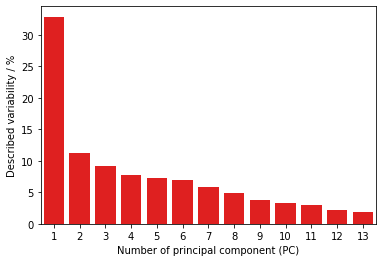

In [5]:
print('Percentage of described variability /%: ', 100 * pca.explained_variance_ratio_)   
sns.barplot(x=np.arange(1,14), y= 100 * pca.explained_variance_ratio_, color='r')  
plt.xlabel('Number of principal component (PC)')   
plt.ylabel('Described variability / %')    
plt.show()   

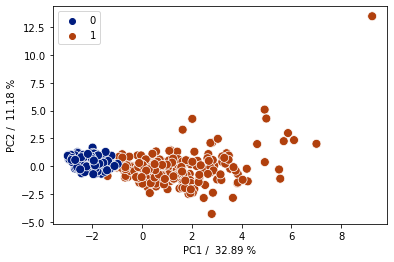

In [6]:
# Projection of objects on the PC1/PC2 plane
sns.scatterplot(x=PC[:,0], y=PC[:,1], palette='dark', hue=y, legend='full', s=80)
plt.xlabel('PC1 / '+'% 4.2f' % (100*pca.explained_variance_ratio_)[0] + ' %')
plt.ylabel('PC2 / '+'% 4.2f' % (100*pca.explained_variance_ratio_)[1] + ' %')
plt.legend()
plt.show() 

In [7]:
pca = PCA(n_components=6)   # conversion into 6 components - significant principal components
pca.fit(X) 
PC = pca.transform(X)

Weights of the 6 principal components: 
[[ 0.1785287  -0.2972433   0.34606806  0.17004891 -0.19416257  0.34101035
   0.28353996 -0.25673523  0.10679924 -0.39901579  0.09928799 -0.3681989
   0.33874907]
 [-0.08201316  0.30440845 -0.20975004 -0.30040035  0.10444567  0.29990523
   0.52222925 -0.38659614  0.20726542  0.06977409 -0.42844184  0.05511764
  -0.09441467]
 [ 0.15923327  0.03842956 -0.03728462  0.40696226  0.15568286  0.19320442
  -0.03939877  0.38606095  0.75648135  0.08354708 -0.09671098  0.059454
  -0.04321043]
 [-0.29562208  0.00153317 -0.11029435  0.14105755  0.69026156  0.00103604
   0.18919363 -0.18392092  0.02103439  0.03664923  0.5650658  -0.06617799
   0.09484424]
 [ 0.77231977  0.14221518 -0.26087268  0.21394159  0.28664143 -0.17810501
   0.02455321 -0.13975264 -0.24470811  0.01573557 -0.13515614  0.00866178
   0.23870738]
 [-0.02138596 -0.13097536  0.0496054   0.57150835 -0.33178619 -0.11398568
   0.28980085 -0.34976598 -0.06672245  0.32134969  0.11959396  0.36140267


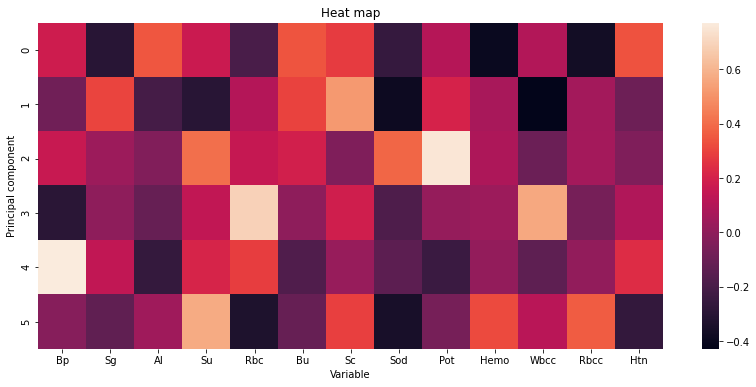

In [11]:
print('Weights of the 6 principal components: ') 
print(pca.components_[0:6,:] )
df_comp = pd.DataFrame(pca.components_, columns = dataset.columns[:-1])  # heat map showing component charges
plt.figure(figsize =(14, 6))
sns.heatmap(df_comp)  
plt.title('Heat map') 
plt.ylabel('Principal component')
plt.xlabel('Variable')
plt.show()